## 4.1
**Import the csv file of the stock which contained the Bollinger columns as well.
Create a new column 'Call' , whose entries are -
'Buy' if the stock price is below the lower Bollinger band
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
'Short' if the stock price is above the upper Bollinger band
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
gail_data = pd.read_csv('GAIL.csv')
gail_data['14 Day MA'] = gail_data['Close Price'].rolling(window=14).mean()
gail_data['30 Day STD'] = gail_data['Close Price'].rolling(window=20).std()
gail_data['Upper Band'] = gail_data['14 Day MA'] + (gail_data['30 Day STD'] * 2)
gail_data['Lower Band'] = gail_data['14 Day MA'] - (gail_data['30 Day STD'] * 2)
gail_data= gail_data.dropna()
gail_data['Mid Band'] = (gail_data['Upper Band']+gail_data['Lower Band'])/2
gail_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
19,GAIL,EQ,09-Jun-2017,388.60,388.00,388.00,378.45,381.00,381.15,381.54,3245904,1.238428e+09,68096,1468159,45.23,398.307143,9.806778,417.920699,378.693587,398.307143
20,GAIL,EQ,12-Jun-2017,381.15,381.00,387.25,376.65,380.90,381.40,384.03,2976063,1.142893e+09,42087,1303506,43.80,398.382143,10.114260,418.610664,378.153622,398.382143
21,GAIL,EQ,13-Jun-2017,381.40,382.00,387.00,379.40,381.90,381.70,382.57,1863735,7.130093e+08,37069,1145228,61.45,397.742857,10.324958,418.392774,377.092941,397.742857
22,GAIL,EQ,14-Jun-2017,381.70,382.10,384.50,379.00,381.50,381.05,381.34,2284680,8.712432e+08,39313,1545587,67.65,396.317857,10.575934,417.469726,375.165988,396.317857
23,GAIL,EQ,15-Jun-2017,381.05,380.00,381.15,373.00,377.10,376.60,375.62,4407491,1.655561e+09,81426,2924252,66.35,394.521429,11.181141,416.883711,372.159146,394.521429
24,GAIL,EQ,16-Jun-2017,376.60,378.65,381.50,377.25,379.55,378.35,379.18,3788173,1.436390e+09,64307,2587029,68.29,392.892857,11.615863,416.124582,369.661132,392.892857
25,GAIL,EQ,19-Jun-2017,378.35,379.35,381.45,374.30,380.35,380.65,378.15,1720791,6.507165e+08,34544,744938,43.29,391.121429,11.940879,415.003187,367.239670,391.121429
26,GAIL,EQ,20-Jun-2017,380.65,380.65,383.40,373.70,375.20,375.20,377.45,2523237,9.524035e+08,43978,1086736,43.07,388.350000,12.274416,412.898832,363.801168,388.350000
27,GAIL,EQ,21-Jun-2017,375.20,375.30,375.55,366.70,368.00,368.25,369.89,1810446,6.696696e+08,38044,964780,53.29,385.342857,13.424511,412.191879,358.493835,385.342857
28,GAIL,EQ,22-Jun-2017,368.25,365.55,367.45,355.20,360.65,360.10,359.31,5673695,2.038599e+09,93401,3442699,60.68,382.325000,14.920962,412.166924,352.483076,382.325000


In [21]:
def select_buy(gail_data):
    if gail_data['Close Price'] < gail_data['Lower Band']:
        return "Buy"
    if gail_data['Close Price'] > gail_data['Lower Band'] and gail_data['Close Price'] < gail_data['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if gail_data['Close Price'] > gail_data['Mid Band'] and gail_data['Close Price'] < gail_data['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if gail_data['Close Price'] > gail_data['Upper Band']:
        return "Short"
gail_data = gail_data.assign(Call = gail_data.apply(select_buy, axis=1))
gail_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band,Call
19,GAIL,EQ,09-Jun-2017,388.60,388.00,388.00,378.45,381.00,381.15,381.54,...,1.238428e+09,68096,1468159,45.23,398.307143,9.806778,417.920699,378.693587,398.307143,Hold Buy/ Liquidate Short
20,GAIL,EQ,12-Jun-2017,381.15,381.00,387.25,376.65,380.90,381.40,384.03,...,1.142893e+09,42087,1303506,43.80,398.382143,10.114260,418.610664,378.153622,398.382143,Hold Buy/ Liquidate Short
21,GAIL,EQ,13-Jun-2017,381.40,382.00,387.00,379.40,381.90,381.70,382.57,...,7.130093e+08,37069,1145228,61.45,397.742857,10.324958,418.392774,377.092941,397.742857,Hold Buy/ Liquidate Short
22,GAIL,EQ,14-Jun-2017,381.70,382.10,384.50,379.00,381.50,381.05,381.34,...,8.712432e+08,39313,1545587,67.65,396.317857,10.575934,417.469726,375.165988,396.317857,Hold Buy/ Liquidate Short
23,GAIL,EQ,15-Jun-2017,381.05,380.00,381.15,373.00,377.10,376.60,375.62,...,1.655561e+09,81426,2924252,66.35,394.521429,11.181141,416.883711,372.159146,394.521429,Hold Buy/ Liquidate Short
24,GAIL,EQ,16-Jun-2017,376.60,378.65,381.50,377.25,379.55,378.35,379.18,...,1.436390e+09,64307,2587029,68.29,392.892857,11.615863,416.124582,369.661132,392.892857,Hold Buy/ Liquidate Short
25,GAIL,EQ,19-Jun-2017,378.35,379.35,381.45,374.30,380.35,380.65,378.15,...,6.507165e+08,34544,744938,43.29,391.121429,11.940879,415.003187,367.239670,391.121429,Hold Buy/ Liquidate Short
26,GAIL,EQ,20-Jun-2017,380.65,380.65,383.40,373.70,375.20,375.20,377.45,...,9.524035e+08,43978,1086736,43.07,388.350000,12.274416,412.898832,363.801168,388.350000,Hold Buy/ Liquidate Short
27,GAIL,EQ,21-Jun-2017,375.20,375.30,375.55,366.70,368.00,368.25,369.89,...,6.696696e+08,38044,964780,53.29,385.342857,13.424511,412.191879,358.493835,385.342857,Hold Buy/ Liquidate Short
28,GAIL,EQ,22-Jun-2017,368.25,365.55,367.45,355.20,360.65,360.10,359.31,...,2.038599e+09,93401,3442699,60.68,382.325000,14.920962,412.166924,352.483076,382.325000,Hold Buy/ Liquidate Short


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_X = gail_data[['Upper Band','Lower Band','Mid Band','Close Price']]
transformed_label = le.fit_transform(gail_data[['Call']])
train_Y = transformed_label.reshape(-1,1)

In [34]:
import sklearn as sk  
from sklearn.linear_model import LogisticRegression  
import pandas as pd  
import os

lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
lr.predict(train_X) 
print("Logistic Regression")
round(lr.score(train_X,train_Y), 4)

Logistic Regression


0.9411

In [31]:
import sklearn as sk  
from sklearn import svm  
import pandas as pd  
import os

SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machines


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5768

In [35]:
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
rf.fit(train_X, train_Y)  
rf.predict(train_X) 
print("Random Forests")
round(rf.score(train_X,train_Y), 4)

Random Forests


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.6968

In [36]:
import sklearn as sk  
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
nn.fit(train_X, train_Y)  
nn.predict(train_X)
print("Neural Networks")
round(nn.score(train_X, train_Y), 4)

Neural Networks


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5137

## 4.2 
**Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
Import the stock data file of your choice
Define 4 new columns , whose values are:
% change between Open and Close price for the day
% change between Low and High price for the day
5 day rolling mean of the day to day % change in Close Price
5 day rolling std of the day to day % change in Close Price
Create a new column 'Action' whose values are:
1 if next day's price(Close) is greater than present day's.
(-1) if next day's price(Close) is less than present day's.
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
Construct a classification model with the 4 new inputs and 'Action' as target
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model**

In [37]:
import pandas as pd
TSLA_data = pd.read_csv('TSLA.csv')
TSLA_data

,Date,Close Price,Open Price,High Price,Low Price,Average Price,Total Traded Quantity
0,"Oct 24, 2019",299.68,298.97,304.74,290.05,298.3600,29820000
1,"Oct 23, 2019",254.68,254.50,256.14,251.35,254.1675,11220000
2,"Oct 22, 2019",255.58,254.32,258.33,250.85,254.7700,4630000
3,"Oct 21, 2019",253.50,258.33,259.50,250.18,255.3775,5110000
4,"Oct 18, 2019",256.95,260.70,262.80,255.10,258.8875,5750000
5,"Oct 17, 2019",261.97,262.50,264.78,260.17,262.3550,4780000
6,"Oct 16, 2019",259.75,257.39,262.10,256.92,259.0400,6700000
7,"Oct 15, 2019",257.89,257.70,260.00,254.12,257.4275,6480000
8,"Oct 14, 2019",256.96,247.90,258.55,247.13,252.6350,10230000
9,"Oct 11, 2019",247.89,247.15,251.08,246.81,248.2325,8490000


In [39]:
TSLA_data['%chg op_cl'] = ((TSLA_data['Close Price'] - TSLA_data ['Open Price'])/(TSLA_data['Close Price']))*100
TSLA_data['%chg lw_hg'] = ((TSLA_data['Close Price'] - TSLA_data ['High Price'])/(TSLA_data['Low Price']))*100
TSLA_data['%chg 5dymean'] = TSLA_data['Close Price'].pct_change().dropna().rolling(5).mean()
TSLA_data['%chg 5dystd'] = TSLA_data['Close Price'].pct_change().dropna().rolling(5).std()
TSLA_data = TSLA_data.dropna()
TSLA_data

,Date,Close Price,Open Price,High Price,Low Price,Average Price,Total Traded Quantity,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,"Oct 17, 2019",261.97,262.50,264.78,260.17,262.3550,4780000,-0.202313,-1.080063,-0.024324,0.071126
6,"Oct 16, 2019",259.75,257.39,262.10,256.92,259.0400,6700000,0.908566,-0.914682,0.004014,0.012618
7,"Oct 15, 2019",257.89,257.70,260.00,254.12,257.4275,6480000,0.073675,-0.830316,0.001875,0.013589
8,"Oct 14, 2019",256.96,247.90,258.55,247.13,252.6350,10230000,3.525841,-0.643386,0.002781,0.012887
9,"Oct 11, 2019",247.89,247.15,251.08,246.81,248.2325,8490000,0.298520,-1.292492,-0.007000,0.019485
10,"Oct 10, 2019",244.74,245.28,249.28,241.58,245.2200,6310000,-0.220642,-1.879295,-0.013449,0.012640
11,"Oct 09, 2019",244.53,241.32,247.29,240.65,243.4475,6940000,1.312722,-1.146894,-0.011926,0.013795
12,"Oct 08, 2019",240.05,235.87,243.94,234.50,238.5900,8700000,1.741304,-1.658849,-0.014158,0.013734
13,"Oct 07, 2019",237.72,229.80,238.56,228.55,233.6575,8090000,3.331651,-0.367534,-0.015378,0.012802
14,"Oct 04, 2019",231.43,231.61,234.78,228.07,231.4725,8020000,-0.077777,-1.468847,-0.013610,0.009565


In [40]:
arr = []
val = []
for value in TSLA_data['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
TSLA_data['Action'] = pd.DataFrame(val)
TSLA_data = TSLA_data.dropna()
TSLA_data

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Date,Close Price,Open Price,High Price,Low Price,Average Price,Total Traded Quantity,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,"Oct 17, 2019",261.97,262.50,264.78,260.17,262.3550,4780000,-0.202313,-1.080063,-0.024324,0.071126,-1.0
6,"Oct 16, 2019",259.75,257.39,262.10,256.92,259.0400,6700000,0.908566,-0.914682,0.004014,0.012618,-1.0
7,"Oct 15, 2019",257.89,257.70,260.00,254.12,257.4275,6480000,0.073675,-0.830316,0.001875,0.013589,-1.0
8,"Oct 14, 2019",256.96,247.90,258.55,247.13,252.6350,10230000,3.525841,-0.643386,0.002781,0.012887,-1.0
9,"Oct 11, 2019",247.89,247.15,251.08,246.81,248.2325,8490000,0.298520,-1.292492,-0.007000,0.019485,1.0
10,"Oct 10, 2019",244.74,245.28,249.28,241.58,245.2200,6310000,-0.220642,-1.879295,-0.013449,0.012640,1.0
11,"Oct 09, 2019",244.53,241.32,247.29,240.65,243.4475,6940000,1.312722,-1.146894,-0.011926,0.013795,1.0
12,"Oct 08, 2019",240.05,235.87,243.94,234.50,238.5900,8700000,1.741304,-1.658849,-0.014158,0.013734,-1.0
13,"Oct 07, 2019",237.72,229.80,238.56,228.55,233.6575,8090000,3.331651,-0.367534,-0.015378,0.012802,1.0
14,"Oct 04, 2019",231.43,231.61,234.78,228.07,231.4725,8020000,-0.077777,-1.468847,-0.013610,0.009565,1.0


In [41]:
from sklearn import preprocessing
train_X = TSLA_data[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = TSLA_data[['Action']]
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
rf.fit(train_X, train_Y)  
rf.predict(train_X) 
print("Random Forests")
round(rf.score(train_X,train_Y), 4)

Random Forests


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6046

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


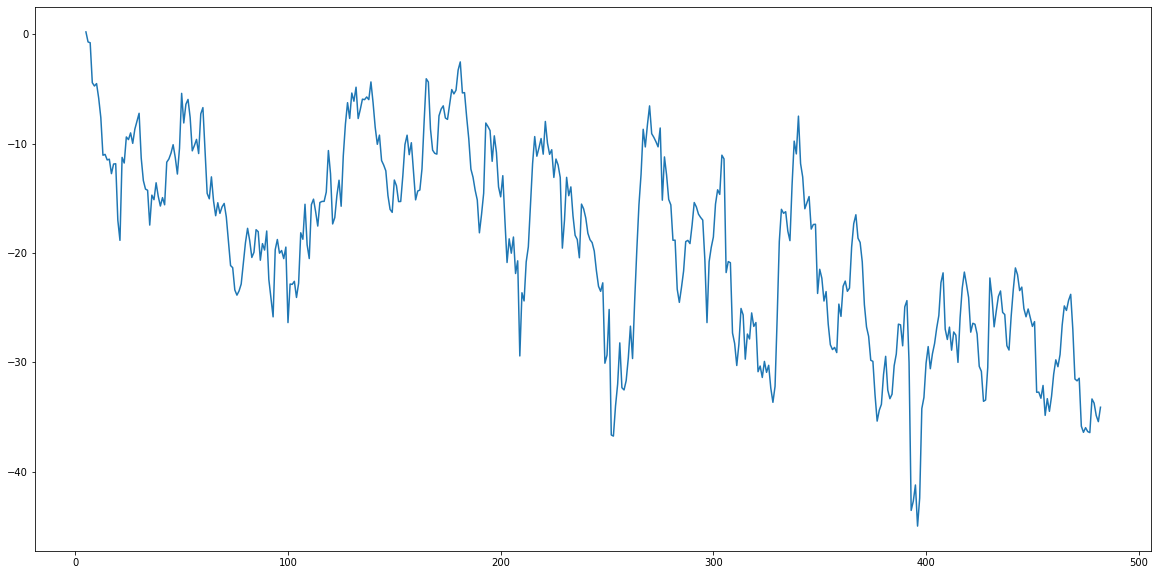

In [42]:
TSLA_data['Net Cummulative Returns'] = (((TSLA_data['Open Price'] - TSLA_data['Close Price'])/(TSLA_data['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(TSLA_data['Net Cummulative Returns'])